<a href="https://colab.research.google.com/github/PhazeRoOman/DeepDTA/blob/Menna's-branch/Davis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers
import numpy as np

protein_dict = { "A": 1, "C": 2, "B": 3, "E": 4, "D": 5, "G": 6,
                "F": 7, "I": 8, "H": 9, "K": 10, "M": 11, "L": 12,
                "O": 13, "N": 14, "Q": 15, "P": 16, "S": 17, "R": 18,
                "U": 19, "T": 20, "W": 21,
                "V": 22, "Y": 23, "X": 24,
                "Z": 25 }
protein_dict_ = { 1: "A", 2: "C", 3: "B", 4: "E", 5: "D", 6: "G",
                7: "F", 8: "I", 9: "H", 10: "K", 11: "M", 12: "L",
                13: "O", 14: "N", 15: "Q", 16: "P", 17: "S", 18: "R",
                19: "U", 20: "T", 21: "W",
                22: "V", 23: "Y", 24: "X",
                25: "Z" }

from google.colab import drive
drive.mount('/content/drive')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 44.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 21.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 88.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 61.9 MB/s eta 0:00:00
Mounted at /content/drive


In [3]:
from scipy.io import loadmat, savemat
data = loadmat('/content/drive/MyDrive/Colab Notebooks/davis.mat')
#aa = loadmat('/content/drive/My Drive/new_rep.mat')

In [14]:
import matplotlib as mb

print(mb.__version__)

3.7.1


In [13]:
!python --version

Python 3.10.12


In [ ]:
!pip list

In [ ]:
import transformers as tf

In [10]:
import tensorflow as tensorf
print(tensorf. __version__)

2.12.0


In [3]:
train_prots = data['train_prots']
val_prots = data['val_prots']
train_Y = data['train_Y'].T
val_Y = data['val_Y'].T
train_drugs = data['train_drugs']
val_drugs = data['val_drugs']

from transformers import BertForMaskedLM, BertTokenizer, pipeline
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
unmasker = pipeline('fill-mask', model=model, tokenizer=tokenizer)
from transformers import BertForMaskedLM, BertTokenizer, pipeline
tokenizer = BertTokenizer.from_pretrained("Rostlab/prot_bert", do_lower_case=False )
model = BertForMaskedLM.from_pretrained("Rostlab/prot_bert")
extractor = pipeline(model=model, task="feature-extraction", tokenizer=tokenizer)
all_prots = np.unique(np.array(np.vstack((train_prots,val_prots))), axis = 0)

Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForMaskedLM from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of the model checkpoint at Rostlab/prot_bert were not used when initializing BertForMaskedLM: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertForMaskedLM from the checkpoint of a model t

58.89255332946777
81.14639282226562
34.953003883361816
40.084986209869385
76.71024537086487
26.99497389793396
27.417949676513672
74.47256731987
75.02950072288513
56.242077350616455
47.649428367614746
57.40329456329346
29.56185746192932
29.704522848129272
35.75808262825012
63.91236424446106
43.44891929626465
52.514989614486694
39.84056353569031
61.118683099746704
39.07107877731323
37.32618427276611
68.66530704498291
37.60263156890869
37.390764236450195
51.54721021652222
75.00328969955444
55.55767893791199
73.46160674095154
43.46517872810364
22.384883642196655
72.89392280578613
34.10657072067261
37.48092222213745
70.74862360954285
30.340216159820557
30.474433183670044
32.70558547973633
26.91671347618103
33.35027098655701
32.71797800064087
25.03541398048401
72.88259267807007
60.425928354263306
34.61137819290161
66.40352725982666
72.91123080253601
70.2986569404602
24.324053049087524
73.74428677558899
49.257561922073364
74.09181594848633
72.85980892181396
40.288153886795044
69.2494153976440

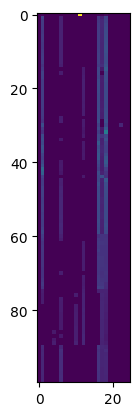

In [5]:
new_rep_all = []
feat_all = []
for i in range(0,len(all_prots)):
  sample =  all_prots[i]
  import time
  start_time = time.time()
  samp_prot = ''
  all_ = []
  for i in range(0, len(sample)):
    if sample [i] ==0:
      break;
    samp_prot = samp_prot + protein_dict_[sample[i]]
    samp_prot = samp_prot + ' '


  result = extractor(samp_prot, return_tensors=True)

  #samp_prot =-7D L I P T S S K L V V  D T S L Q V K K A F F A L V T'
  for i in range(0,len(samp_prot), 30):
    new_sam_prot = samp_prot[max(0, i-60):i] + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]'+ ' ' + '[MASK]' + samp_prot[(i+30):min(i+60+30, len(samp_prot))]
    all_.append(new_sam_prot)
  out = unmasker(all_)
  #print(out)

  import numpy as np

  new_rep = np.zeros((1000, 25))
  for i in range(len(out)):
    for j in range(len(out[i])):
      if i*15+j<1000:
        #print(out[i][j])
        score = [d1.get('score') for d1 in out[i][j]]
        letter = [protein_dict[d1.get('token_str')] for d1 in out[i][j]]
        new_rep[i*15+j, letter] = score
  print(time.time()-start_time)
  new_rep_all.append(new_rep)
  result = np.squeeze(result.numpy())
  feat_all.append(result)
  savemat('/content/drive/My Drive/new_rep1.mat', mdict={'new_rep_all': new_rep_all, 'feat_all': feat_all})
  #savemat('/content/drive/My Drive/feat_all1.mat', mdict={'feat_all': feat_all})
print(samp_prot)

import matplotlib.pyplot as plt
plt.imshow(new_rep[0:100,:])
plt.show()

In [ ]:
print(aa['new_rep_all'].shape)


(67, 1000, 25)


In [ ]:
import numpy as np
from scipy.io import loadmat
import tensorflow as tf, keras
from keras import layers
from keras.optimizers import Adam
from keras.losses import MeanSquaredError
from keras.metrics import MeanSquaredError
from keras.callbacks import EarlyStopping,LearningRateScheduler
from google.colab import drive
from keras.layers.regularization.spatial_dropout3d import Dropout
from keras.layers import Input, Dense, Average, Concatenate, Conv1D, GlobalAveragePooling1D, Embedding
from keras.models import Model

def attention_protein(query, key, value):

    scores = tf.matmul(query, tf.transpose(key, (0,2,1)))
    attention_weights = tf.nn.softmax(scores, axis=-1)
    attended_values = tf.matmul(attention_weights, value)

    return attention_weights, attended_values

smiles_max_len = 100
protein_max_len = 1000


smiles_dict = {"#": 29, "%": 30, ")": 31, "(": 1, "+": 32, "-": 33, "/": 34, ".": 2,
                "1": 35, "0": 3, "3": 36, "2": 4, "5": 37, "4": 5, "7": 38, "6": 6,
                "9": 39, "8": 7, "=": 40, "A": 41, "@": 8, "C": 42, "B": 9, "E": 43,
                "D": 10, "G": 44, "F": 11, "I": 45, "H": 12, "K": 46, "M": 47, "L": 13,
                "O": 48, "N": 14, "P": 15, "S": 49, "R": 16, "U": 50, "T": 17, "W": 51,
                "V": 18, "Y": 52, "[": 53, "Z": 19, "]": 54, "\\": 20, "a": 55, "c": 56,
                "b": 21, "e": 57, "d": 22, "g": 58, "f": 23, "i": 59, "h": 24, "m": 60,
                "l": 25, "o": 61, "n": 26, "s": 62, "r": 27, "u": 63, "t": 28, "y": 64}

smiles_dict_len = 64

Drug_input = Input(shape=(smiles_max_len,), dtype='int32',name='drug_input')


encode_smiles = Embedding(input_dim=smiles_dict_len+1, output_dim = 100, input_length=smiles_max_len,name='smiles_embedding')(Drug_input)
encode_smiles = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=1, name='conv1_smiles')(encode_smiles)
# encode_smiles = MaxPooling1D(2)(encode_smiles)  # test it is effectuve or not
encode_smiles = Conv1D(filters=100*2, kernel_size=3,  activation='relu', padding='valid',  strides=1, name='conv2_smiles')(encode_smiles)
#encode_smiles = MaxPooling1D(2)(encode_smiles)
encode_smiles = Conv1D(filters=100*3, kernel_size=3,  activation='relu', padding='valid',  strides=1, name='conv3_smiles')(encode_smiles)
encode_smiles = GlobalAveragePooling1D()(encode_smiles)

Protein_input = Input(shape=(protein_max_len,200),name='protein_input')
conv_prot_1 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv1_prot')(Protein_input)
conv_prot_2 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv2_prot')(conv_prot_1)
conv_prot_3 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv3_prot')(conv_prot_2)
conv_prot_4 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv4_prot')(conv_prot_3)
conv_prot_5 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv5_prot')(conv_prot_4)
conv_prot_6 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv6_prot')(conv_prot_5)
conv_prot_7 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='same',  strides=1, name='conv7_prot')(conv_prot_6)

attention_weights1, attended_values1 = attention_protein(conv_prot_2,conv_prot_2,conv_prot_2)
attention_weights2, attended_values2 = attention_protein(conv_prot_2,conv_prot_4,conv_prot_4)
attention_weights3, attended_values3 = attention_protein(conv_prot_2,conv_prot_7,conv_prot_7)
attention_weights4, attended_values4 = attention_protein(conv_prot_4,conv_prot_4,conv_prot_4)
attention_weights5, attended_values5 = attention_protein(conv_prot_4,conv_prot_2,conv_prot_2)
attention_weights6, attended_values6 = attention_protein(conv_prot_4,conv_prot_7,conv_prot_7)
attention_weights7, attended_values7 = attention_protein(conv_prot_7,conv_prot_4,conv_prot_4)
attention_weights8, attended_values8 = attention_protein(conv_prot_7,conv_prot_2,conv_prot_2)
attention_weights9, attended_values9 = attention_protein(conv_prot_7,conv_prot_7,conv_prot_7)

attention_weights = Average()([attention_weights1,attention_weights2,attention_weights3,attention_weights4,attention_weights5,
           attention_weights6,attention_weights7,attention_weights8,attention_weights9])
attended_values = Average()([attended_values1,attended_values2,attended_values3,attended_values4,attended_values5,
                             attended_values6,attended_values7,attended_values8,attended_values9])
conv_prot_att_weights_1 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=2, name='conv_prot_att_weights_1')(attention_weights)
conv_prot_att_weights_2 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=2, name='conv_prot_att_weights_2')(conv_prot_att_weights_1)
conv_prot_att_weights_3 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=1, name='conv_prot_att_weights_3')(conv_prot_att_weights_2)

conv_prot_att_value_1 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=2, name='conv_prot_att_value_1')(attended_values)
conv_prot_att_value_2 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=2, name='conv_prot_att_value_2')(conv_prot_att_value_1)
conv_prot_att_value_3 = Conv1D(filters=100, kernel_size=3,  activation='relu', padding='valid',  strides=1, name='conv_prot_att_value_3')(conv_prot_att_value_2)


prot_att_weights = GlobalAveragePooling1D()(conv_prot_att_weights_3)
prot_att_value = GlobalAveragePooling1D()(conv_prot_att_value_3)

prot_out = Concatenate()([prot_att_weights, prot_att_value])

encode_interaction = Concatenate()([prot_out, encode_smiles])

FC1 = Dense(1024, activation='relu', name='dense1')(encode_interaction)
FC2 = Dropout(0.1)(FC1)
FC2 = Dense(1024, activation='relu', name='dense2')(FC2)
FC2 = Dropout(0.1)(FC2)
FC2 = Dense(512, activation='relu', name='dense3')(FC2)
# And add a logistic regression on top
predictions = Dense(1, kernel_initializer='normal', name='dense4')(FC2) # if you want train model for active/inactive set activation='sigmoid'

model = Model(inputs=[Drug_input, Protein_input], outputs=[predictions])

print(model.summary())


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 protein_input (InputLayer)     [(None, 1000, 200)]  0           []                               
                                                                                                  
 conv1_prot (Conv1D)            (None, 1000, 100)    60100       ['protein_input[0][0]']          
                                                                                                  
 conv2_prot (Conv1D)            (None, 1000, 100)    30100       ['conv1_prot[0][0]']             
                                                                                                  
 conv3_prot (Conv1D)            (None, 1000, 100)    30100       ['conv2_prot[0][0]']             
                                                                                              